**Importing needed packages**

In [1]:
import os, torch, clip
from PIL import Image
import matplotlib.pyplot as plt

**Feeding the dataset to the CLIP model**

*Loads the model and preprocesses the dataset
 Makes 2 lists for images and names,
 then appends imgs with the images.
 After that, we encode the images so we can put a query and get pics.*

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

# Load all folder images
folder = "images"
imgs, names = [], []
for f in os.listdir(folder):
    if f.endswith((".jpg",".png",".jpeg")):
        names.append(f)
        imgs.append(preprocess(Image.open(os.path.join(folder,f)).convert("RGB")).unsqueeze(0))

imgs = torch.cat(imgs).to(device)
img_feats = model.encode_image(imgs).detach()

**Get an image to compare**

*Preprocesses the queried images and check cosine similarity with other images from the dataset, and then gives the top 2 results*

Query Image: images/family_1.jpg


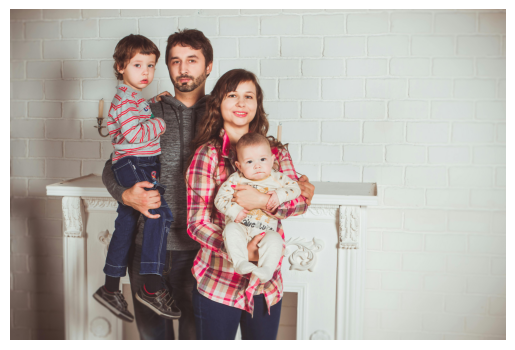


Top Matches:
family_1.jpg


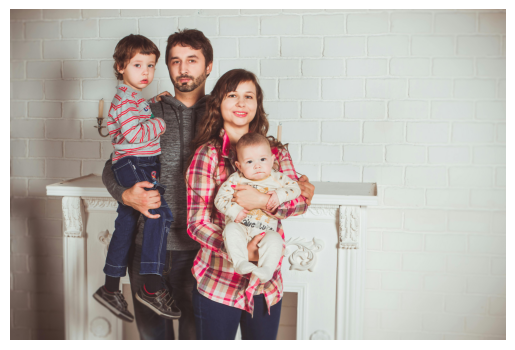

family.jpg


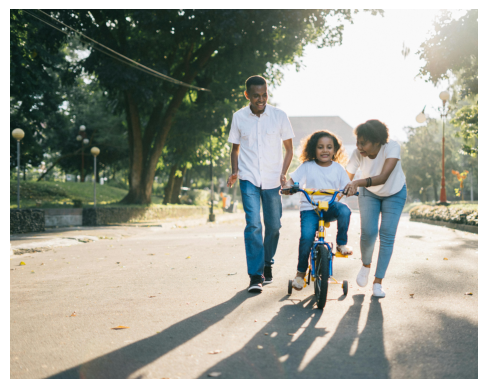

In [8]:
# Load query image A
query_path = "images/family_1.jpg"   # change this to your input image
query_img = preprocess(Image.open(query_path).convert("RGB")).unsqueeze(0).to(device)
query_feat = model.encode_image(query_img).detach()

# Compare similarity
sims = (img_feats @ query_feat.T).squeeze()
topk = sims.topk(2).indices  # top 5 similar

# Show results
print("Query Image:", query_path)
plt.imshow(Image.open(query_path))
plt.axis("off")
plt.show()

print("\nTop Matches:")
for i in topk:
    path = os.path.join(folder, names[i])
    print(names[i])
    plt.imshow(Image.open(path))
    plt.axis("off")
    plt.show()